In [131]:
import numpy as np
from scipy import stats
import pandas as pd
from pandas.tseries.offsets import DateOffset
import matplotlib.pyplot as pl
import matplotlib.dates as mdates
from matplotlib import rcParams
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot
from statsmodels.tsa.stattools import adfuller

In [5]:
pd.__version__

'0.23.0'

In [6]:
% matplotlib inline

In [7]:
rcParams['axes.formatter.limits'] = (-2, 3)
rcParams['xtick.labelsize'] = 16
rcParams['ytick.labelsize'] = 16
rcParams['axes.titlesize'] = 20
rcParams['axes.labelsize'] = 16
rcParams['xtick.minor.visible'] = True
rcParams['xtick.minor.size'] = 4
rcParams['xtick.major.size'] = 8

In [138]:
mo_ticks = mdates.MonthLocator()
yr_ticks = mdates.YearLocator()


def set_ts_xaxis(ax):
    ax.xaxis.set_major_locator(yr_ticks)
    ax.xaxis.set_minor_locator(mo_ticks)
    

def run_adfuller(series_values):
    result = adfuller(series_values)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print('Critical Values:')
    for key, val in result[4].items():
        print(f'\t{key}: {val:.3}')

In [9]:
chl_file = './dataJar/seawifs_chl_monthly_15sosectors_repro2018.dat'
df = pd.read_csv(chl_file, delim_whitespace=True, parse_dates=[[0, 1 ,2]], index_col=0)

In [12]:
df.index.name=''

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 156 entries, 1997-09-15 to 2010-11-15
Data columns (total 15 columns):
IOSTZ      154 non-null float64
IOSAZ      154 non-null float64
IOPFZ      154 non-null float64
IOAAZ      147 non-null float64
IOSAACZ    122 non-null float64
POSTZ      154 non-null float64
POSAZ      154 non-null float64
POPFZ      123 non-null float64
POAAZ      117 non-null float64
POSAACZ    98 non-null float64
AOSTZ      152 non-null float64
AOSAZ      152 non-null float64
AOPFZ      151 non-null float64
AOAAZ      138 non-null float64
AOSAAC     125 non-null float64
dtypes: float64(15)
memory usage: 19.5 KB


In [14]:
df.head().T

,1997-09-15 00:00:00,1997-10-16 00:00:00,1997-11-15 00:00:00,1997-12-16 00:00:00,1998-01-16 00:00:00
IOSTZ,0.25504,0.25901,0.25415,0.25694,0.21884
IOSAZ,0.18112,0.18716,0.21564,0.22807,0.19447
IOPFZ,0.18853,0.20684,0.22538,0.25853,0.20114
IOAAZ,0.17979,0.20181,0.25342,0.35609,0.23786
IOSAACZ,0.21585,0.15529,0.15500,0.31321,0.32963
POSTZ,0.26715,0.28875,0.26712,0.24081,0.19977
POSAZ,0.17723,0.17102,0.18598,0.20120,0.15548
POPFZ,0.15366,0.14497,0.22155,0.33682,0.20036
POAAZ,0.16648,0.20121,0.33133,0.35429,0.21936
POSAACZ,0.10820,0.09423,0.22698,0.71735,0.80755


In [15]:
df.index.day.unique()

Int64Index([15, 16, 14], dtype='int64', name='')

In [16]:
df.index.day.value_counts()

16    90
15    56
14    10
Name: , dtype: int64

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
IOSTZ,154.0,0.230624,0.026427,0.17137,0.209753,0.226380,0.249805,0.32334
IOSAZ,154.0,0.189563,0.027641,0.13570,0.169382,0.184010,0.206177,0.29009
IOPFZ,154.0,0.187936,0.042198,0.14275,0.159938,0.170055,0.199705,0.31315
IOAAZ,147.0,0.201590,0.059829,0.12526,0.161235,0.179790,0.222275,0.38888
IOSAACZ,122.0,0.245404,0.143576,0.09119,0.149998,0.186490,0.319885,0.88645
POSTZ,154.0,0.239681,0.049997,0.14145,0.204460,0.233810,0.267143,0.42006
POSAZ,154.0,0.191227,0.026511,0.15006,0.170725,0.188765,0.204613,0.28741
POPFZ,123.0,0.162097,0.045553,0.10040,0.134320,0.147710,0.171955,0.33682
POAAZ,117.0,0.227333,0.091257,0.10874,0.154130,0.201210,0.271920,0.53333
POSAACZ,98.0,0.509564,0.355061,0.08278,0.180732,0.432550,0.757450,1.47704


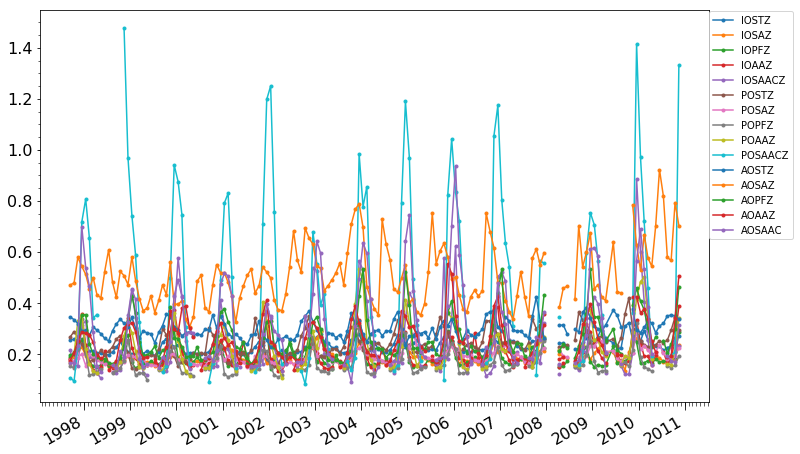

In [114]:
f, ax = pl.subplots(figsize=(12, 8))
df.plot(ax=ax, marker='.');
ax.set_xlabel('')
ax.legend(loc=(1, 0.415))
set_ts_xaxis(ax)

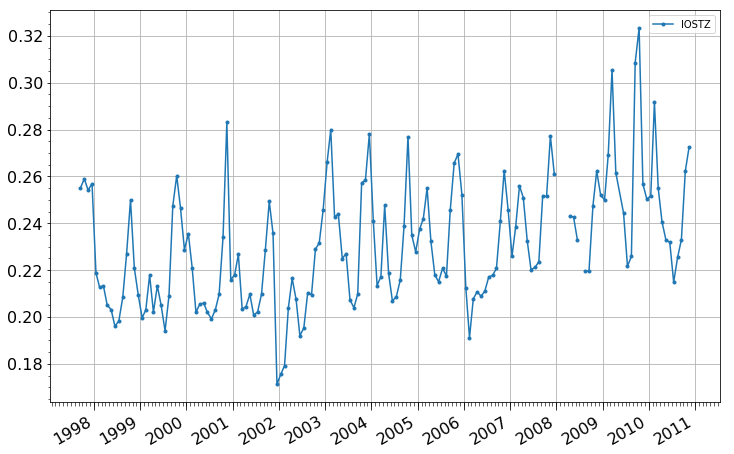

In [115]:
f, ax = pl.subplots(figsize=(12, 8))
df.plot(y='IOSTZ', ax=ax, marker='.');
ax.set_xlabel('')
ax.grid()
set_ts_xaxis(ax)

In [106]:
# resample and set  date to the 15'th
df30 = df.resample('MS').mean()

In [107]:
# Optionally the below can be used to have the dates labeled as the 16th of the month
didx = pd.date_range(start='1/1/1997', end='12/1/2010', freq='MS') + DateOffset(days=15)

In [108]:
df30.index.day.unique()

Int64Index([1], dtype='int64', name='')

In [109]:
df30['IOSTZi'] = df30.IOSTZ.interpolate()

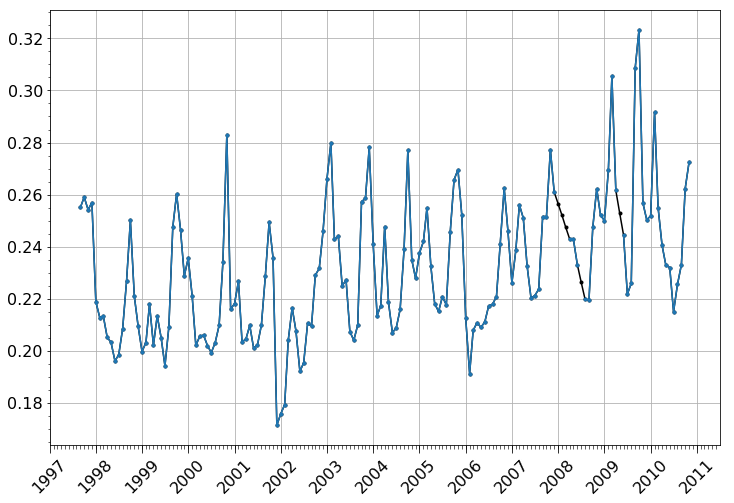

In [116]:
f, ax = pl.subplots(figsize=(12, 8))
ax.plot(df30.index, df30.IOSTZi, marker='.' , color='k')
ax.plot(df30.index, df30.IOSTZ, marker='.')
ax.set_xlabel('')
ax.xaxis.set_ticklabels(ticklabels=df30.index.year.unique().tolist()+['2011'],
                        rotation=45)
set_ts_xaxis(ax)
ax.grid()

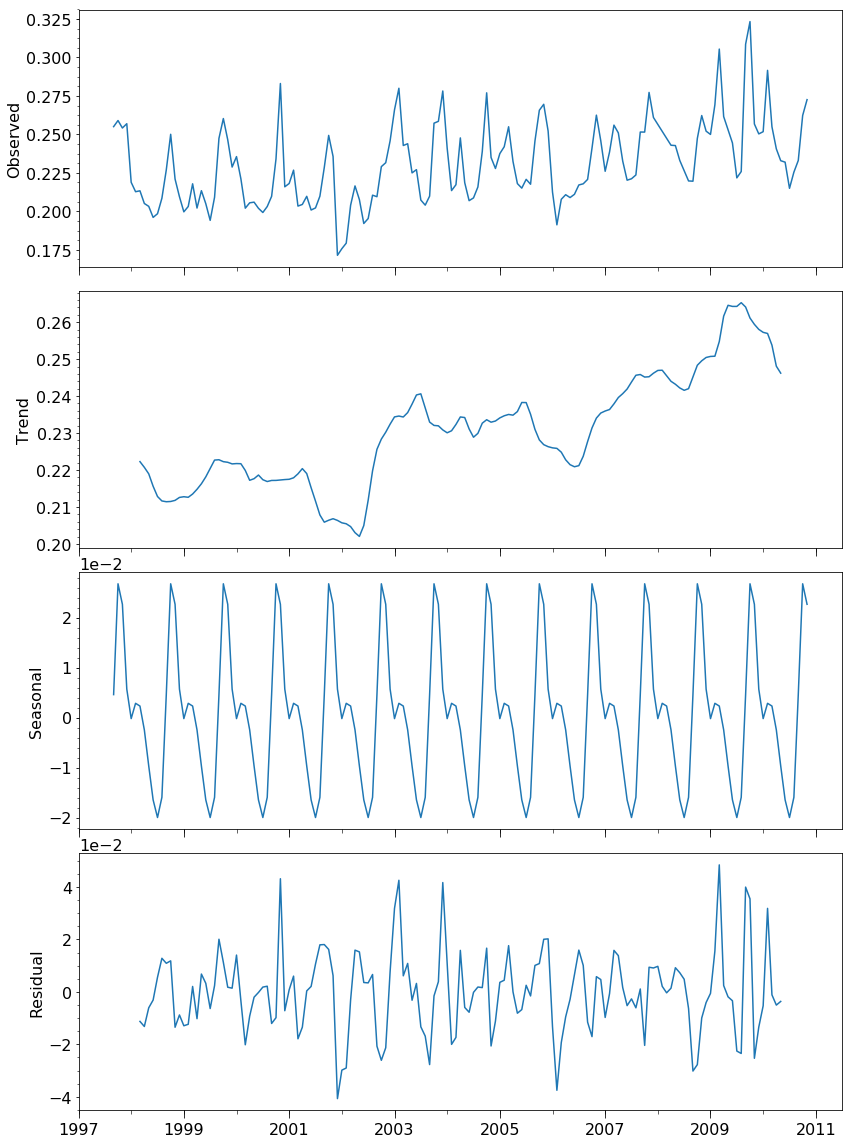

In [119]:
decomposition = sm.tsa.seasonal_decompose(df30.IOSTZi, model='additive', )
fig = decomposition.plot();
fig.set_figheight(16)
fig.set_figwidth(12)
fig.tight_layout(h_pad=0.2)

In [139]:
run_adfuller(df30.IOSTZi)

ADF Statistic: -1.5532930734103474
p-value: 0.5070028517066248
Critical Values:
	1%: -3.48
	5%: -2.88
	10%: -2.58


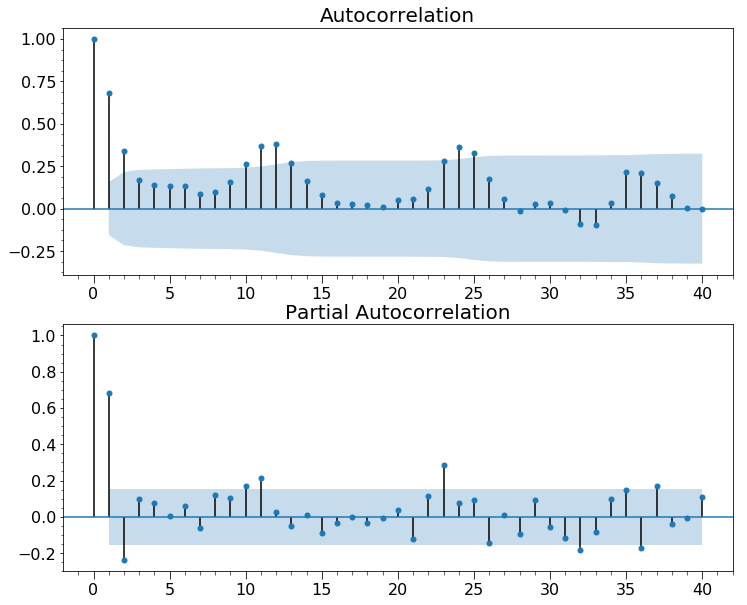

In [140]:
f, axs = pl.subplots(nrows=2, figsize=(12, 10))
sm.graphics.tsa.plot_acf(df30.IOSTZi, lags=40, ax=axs[0]);
sm.graphics.tsa.plot_pacf(df30.IOSTZi, lags=40, ax=axs[1]);

In [124]:
ar=sm.tsa.AR(df30.IOSTZi).fit(disp=False)

In [126]:
print(ar.params)

const         0.036591
L1.IOSTZi     0.791082
L2.IOSTZi    -0.291727
L3.IOSTZi     0.029089
L4.IOSTZi     0.111584
L5.IOSTZi    -0.116800
L6.IOSTZi     0.160854
L7.IOSTZi    -0.147742
L8.IOSTZi     0.068753
L9.IOSTZi     0.020140
L10.IOSTZi    0.035060
L11.IOSTZi    0.151120
L12.IOSTZi    0.077020
L13.IOSTZi   -0.043298
dtype: float64


In [127]:
arma_30 = sm.tsa.ARMA(df30.IOSTZi, (3,0)).fit(disp=False)
print(arma_30.params)

const           0.231698
ar.L1.IOSTZi    0.870826
ar.L2.IOSTZi   -0.309556
ar.L3.IOSTZi    0.088258
dtype: float64


In [128]:
from statsmodels.tsa.stattools import adfuller

In [129]:
iostz_result = adfuller(df30.IOSTZi.values)

In [130]:
iostz_result

(-1.5532930734103474,
 0.5070028517066248,
 10,
 148,
 {'1%': -3.4753253063120644,
  '5%': -2.881274703275226,
  '10%': -2.5772928360116873},
 -731.9799762825078)